In [1]:
#All Data
allData=[]
dataPath=r'Bank(N)_v2.csv'
import csv
with open(dataPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     allData.append(r)
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(allData)):
    #Row Data
    rowData=[]
    for c in range(0,len(allData[r])):
        rowData.append(allData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
X=[]
y=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X.append(rowData)
    y.append(float(pureData[r][len(pureData[r])-1])/1000)
#Scale
scale=0.3
from sklearn.model_selection import train_test_split
#訓練集(Feature),測試集(Feature),訓練集(Class),測試集(Class)
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y, test_size=scale)

In [2]:
from sklearn.svm import SVR
model = SVR(kernel="linear")
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)


Text(0.5, 1.0, 'SVR')

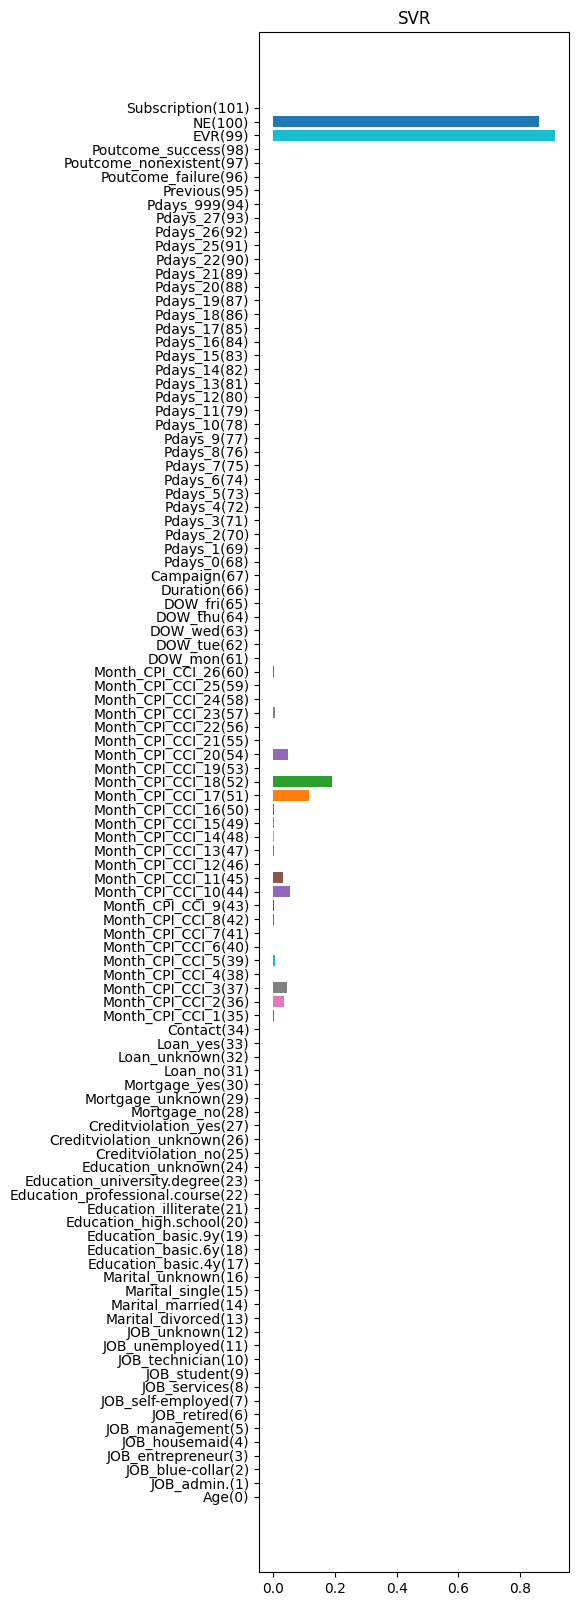

In [3]:
import numpy as np
import matplotlib.pyplot as FeturePlt
from sklearn.inspection import permutation_importance
results = permutation_importance(model, Xtrain, ytrain, scoring='neg_mean_squared_error')
importance = results.importances_mean
feature_Importance=[]
for f in importance:
    feature_Importance.append(f)
FeturePlt.figure(figsize=(4,20))
for f in range(0,len(feature_Importance)):
    FeturePlt.barh(feature[f]+"("+str(f)+")", feature_Importance[f])
FeturePlt.title("SVR")

訓練準確率:  0.999073221321745
測試準確率:  0.9990519312911081
MSE:  0.002829015797632199
RMSE:  0.05318849309420411
MAPE:  0.017648756336738933


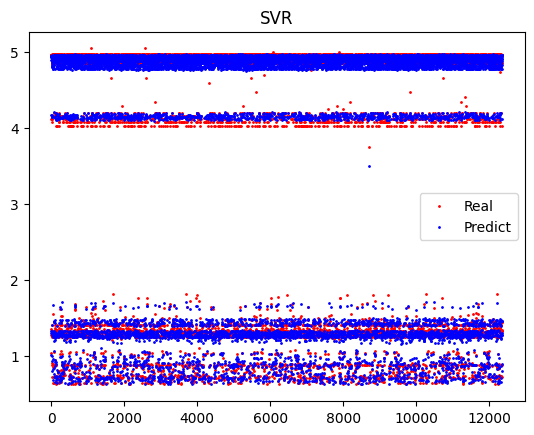

In [20]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(Xtrain, ytrain))
print("測試準確率: ",model.score(Xtest, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("SVR")
plt.legend()
plt.show()

訓練準確率:  0.9987520925201926
測試準確率:  0.9982484721712559
MSE:  0.005226519819751551
RMSE:  0.07229467352268458
MAPE:  0.026001079015392843


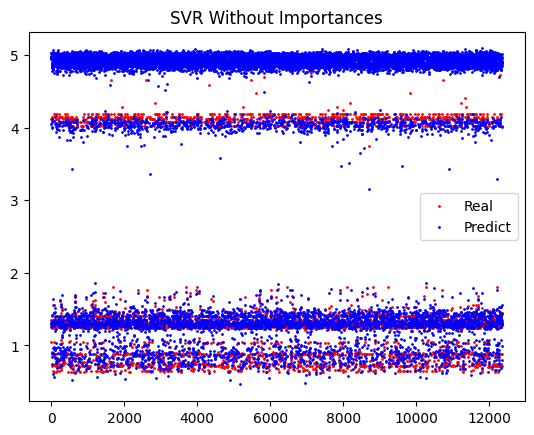

In [21]:
from sklearn.svm import SVR
model = SVR()
XtrainWithoutImport=[]
XtestWithoutImport=[]
for tra in range(0,len(Xtrain)):
    daArray=[]
    for col in range(0,len(Xtrain[tra])):
        if(col!=54 and col!=99 and col!=100):
            daArray.append(Xtrain[tra][col])
    XtrainWithoutImport.append(daArray)
for tra in range(0,len(Xtest)):
    daArray=[]
    for col in range(0,len(Xtest[tra])):
        if(col!=54 and col!=99 and col!=100):
            daArray.append(Xtest[tra][col])
    XtestWithoutImport.append(daArray)
model.fit(XtrainWithoutImport, ytrain)
ypred = model.predict(XtestWithoutImport)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(XtrainWithoutImport, ytrain))
print("測試準確率: ",model.score(XtestWithoutImport, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("SVR Without Importances")
plt.legend()
plt.show()

訓練準確率:  0.9978891468202832
測試準確率:  0.9979519759732786
MSE:  0.006111257835201986
RMSE:  0.07817453444186276
MAPE:  0.029375270913003786


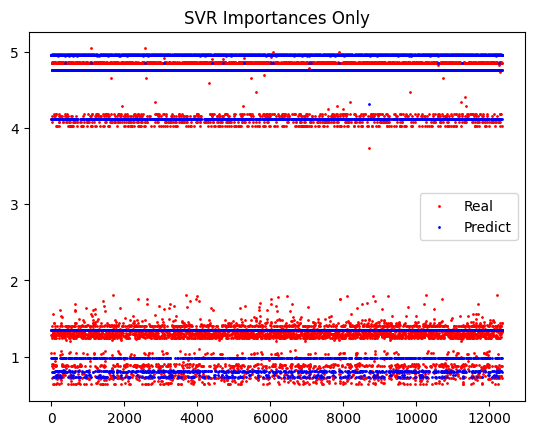

In [22]:
from sklearn.svm import SVR
model = SVR()
XtrainWithoutImport=[]
XtestWithoutImport=[]
for tra in range(0,len(Xtrain)):
    daArray=[]
    for col in range(0,len(Xtrain[tra])):
        if(col==54 or col==99 or col==100):
            daArray.append(Xtrain[tra][col])
    XtrainWithoutImport.append(daArray)
for tra in range(0,len(Xtest)):
    daArray=[]
    for col in range(0,len(Xtest[tra])):
        if(col==54 or col==99 or col==100):
            daArray.append(Xtest[tra][col])
    XtestWithoutImport.append(daArray)
model.fit(XtrainWithoutImport, ytrain)
ypred = model.predict(XtestWithoutImport)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(XtrainWithoutImport, ytrain))
print("測試準確率: ",model.score(XtestWithoutImport, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("SVR Importances Only")
plt.legend()
plt.show()